 **Problem statement**: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

**Motivation**: To create a multiclass classification model using a custom convolutional neural network in tensorflow

**Data Summary:**

The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.

The data set contains the following diseases:

Actinic keratosis
Basal cell carcinoma
Dermatofibroma
Melanoma
Nevus
Pigmented benign keratosis
Seborrheic keratosis
Squamous cell carcinoma
Vascular lesion

In [1]:
##  using the data by mounting the google drive :

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Import Libraries**

In [3]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import glob
import tensorflow as tf
import keras
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob
from tensorflow.keras.layers import BatchNormalization
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

# Data Reading/Data Understanding → Defining the path for train and test images

In [4]:
# Defining the path for train and test images
root_path = '/content/gdrive/MyDrive/CNN'
data_dir_train = pathlib.Path(root_path + '/Train')
data_dir_test = pathlib.Path(root_path + '/Test')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


# Dataset Creation→ Create train & validation dataset from the train directory with a batch size of 32. Also, resize images to 180*180.

In [7]:
#Define some parameters for the loader:¶
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.



In [8]:
### Write train dataset here
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size = (img_height, img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [9]:
### Write validation dataset here
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size = (img_height, img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


# Dataset visualisation → Create a code to visualize one instance of all the nine classes present in the dataset


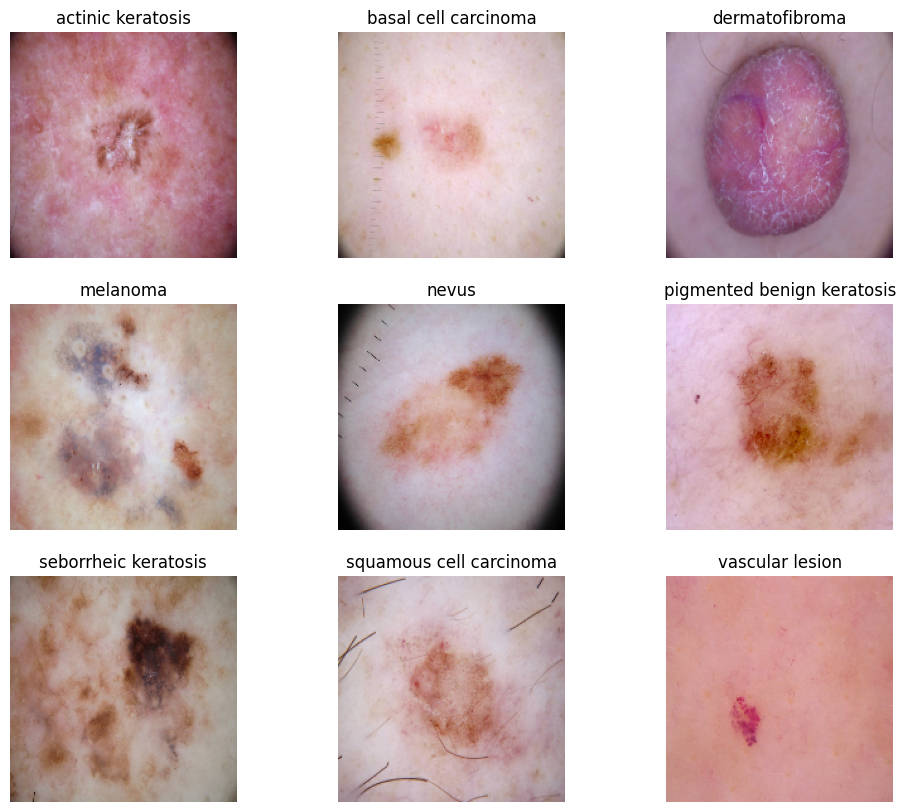

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
for i in range(len(class_names)):
  filtered_ds = train_ds.filter(lambda x,l:tf.math.equal(l[0], i))
  for image, label in filtered_ds.take(1):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(image[0].numpy().astype('uint8'))
    plt.title(class_names[label.numpy()[0]])
    plt.axis('off')

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Model Building & training :


Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescale images to normalize pixel values between (0,1).

In [13]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

**Compile the model :**
Choose an appropriate optimiser and loss function for model training[link text](https://)

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

**Train the model** : Train the model for ~20 epochs

In [16]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 276s 4s/step - loss: 2.0745 - accuracy: 0.2249 - val_loss: 1.9996 - val_accuracy: 0.2237
Epoch 2/20
56/56 [==============================] - 65s 1s/step - loss: 1.8977 - accuracy: 0.2801 - val_loss: 1.8262 - val_accuracy: 0.3311
Epoch 3/20
56/56 [==============================] - 74s 1s/step - loss: 1.6663 - accuracy: 0.4152 - val_loss: 1.4882 - val_accuracy: 0.5034
Epoch 4/20
56/56 [==============================] - 64s 1s/step - loss: 1.4453 - accuracy: 0.4849 - val_loss: 1.4686 - val_accuracy: 0.5145
Epoch 5/20
56/56 [==============================] - 69s 1s/step - loss: 1.2878 - accuracy: 0.5458 - val_loss: 1.5647 - val_accuracy: 0.4609
Epoch 6/20
56/56 [==============================] - 65s 1s/step - loss: 1.2122 - accuracy: 0.5608 - val_loss: 1.4069 - val_accuracy: 0.5436
Epoch 7/20
56/56 [==============================] - 70s 1s/step - loss: 1.1534 - accuracy: 0.5910 - val_loss: 1.4430 - val_accuracy: 0.5190
Epoch 8/20
56/56 [=

**Visualizing training results** : Write findings after the model fit. Check if there is any evidence of model overfit or underfit.


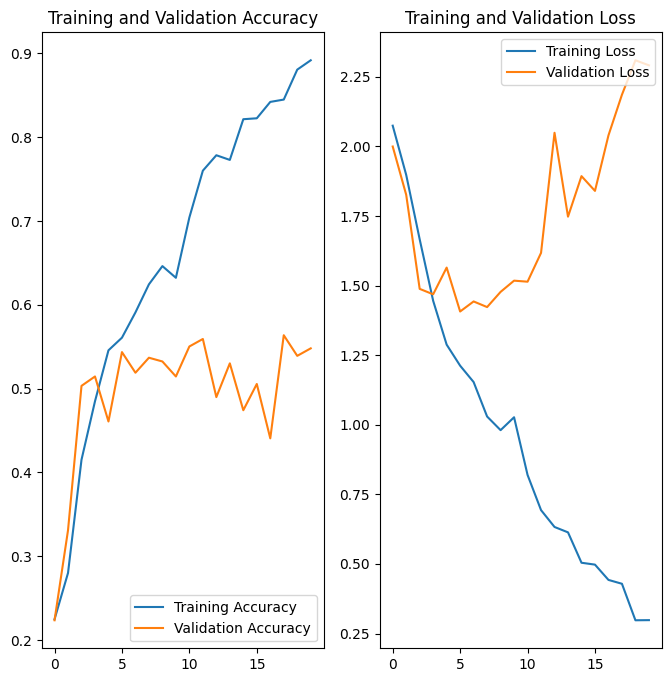

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Findings:**

1. We can clearly observe a drastic difference between Traning and Validation Accuracy, which indicates that the model has overfitted


2. Also we can observe that the validation accuracy the model has achieved is below 55 %
Overall we need to apply techniques like Data Augmentation and Dropout to handle the overfitting issue of the model

# Data Augmentation :
Chose an appropriate data augmentation strategy to resolve underfitting/overfitting


In [18]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

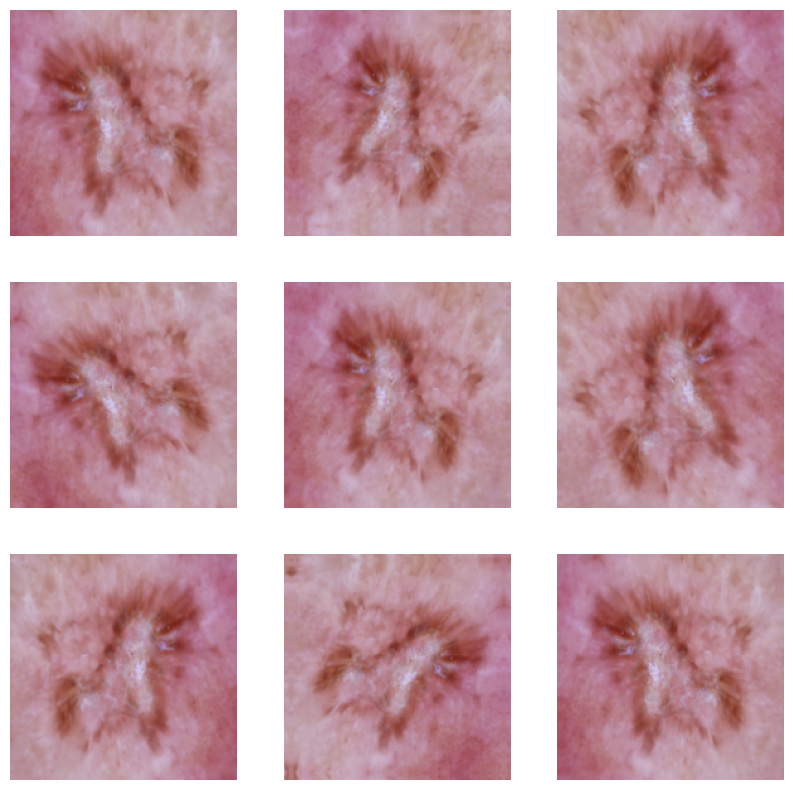

In [19]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

# Model Building & training on the augmented data :


In [20]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

Compiling the model


In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Training the model


In [22]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 76s 1s/step - loss: 2.1020 - accuracy: 0.1925 - val_loss: 1.9960 - val_accuracy: 0.2774
Epoch 2/20
56/56 [==============================] - 78s 1s/step - loss: 1.8739 - accuracy: 0.3036 - val_loss: 1.8567 - val_accuracy: 0.2931
Epoch 3/20
56/56 [==============================] - 73s 1s/step - loss: 1.6277 - accuracy: 0.4213 - val_loss: 1.5071 - val_accuracy: 0.4855
Epoch 4/20
56/56 [==============================] - 70s 1s/step - loss: 1.4554 - accuracy: 0.4704 - val_loss: 1.5267 - val_accuracy: 0.4743
Epoch 5/20
56/56 [==============================] - 73s 1s/step - loss: 1.4116 - accuracy: 0.5022 - val_loss: 1.4411 - val_accuracy: 0.5078
Epoch 6/20
56/56 [==============================] - 71s 1s/step - loss: 1.3592 - accuracy: 0.5039 - val_loss: 1.3592 - val_accuracy: 0.5324
Epoch 7/20
56/56 [==============================] - 73s 1s/step - loss: 1.2943 - accuracy: 0.5413 - val_loss: 1.4735 - val_accuracy: 0.5190
Epoch 8/20
56/56 [==

Visualizing the results


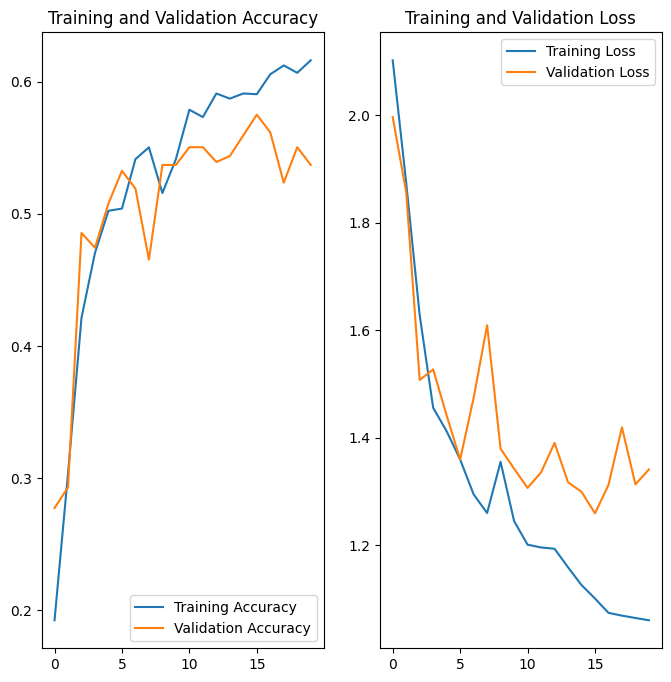

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Findings:**

As we can see that now the Training and Validation accuracy are almost in the same level and the highest accuracy achieved is around 60% , this shows the impact of how performing Data Augmentation can improve the model performance
But we can still try to increase the accuracy of the model

# Class distribution:
Examine the current class distribution in the training dataset

In [24]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
dataframe_dict_original = dict(zip(path_list, lesion_list))
df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
df

,Path,Label
0,/content/gdrive/MyDrive/CNN/Train/basal cell c...,basal cell carcinoma
1,/content/gdrive/MyDrive/CNN/Train/basal cell c...,basal cell carcinoma
2,/content/gdrive/MyDrive/CNN/Train/basal cell c...,basal cell carcinoma
3,/content/gdrive/MyDrive/CNN/Train/basal cell c...,basal cell carcinoma
4,/content/gdrive/MyDrive/CNN/Train/basal cell c...,basal cell carcinoma
...,...,...
2234,/content/gdrive/MyDrive/CNN/Train/actinic kera...,actinic keratosis
2235,/content/gdrive/MyDrive/CNN/Train/actinic kera...,actinic keratosis
2236,/content/gdrive/MyDrive/CNN/Train/actinic kera...,actinic keratosis
2237,/content/gdrive/MyDrive/CNN/Train/actinic kera...,actinic keratosis


Class=1, n=376 (16.793%)
Class=7, n=181 (8.084%)
Class=4, n=357 (15.945%)
Class=3, n=438 (19.562%)
Class=8, n=139 (6.208%)
Class=6, n=77 (3.439%)
Class=5, n=462 (20.634%)
Class=2, n=95 (4.243%)
Class=0, n=114 (5.092%)


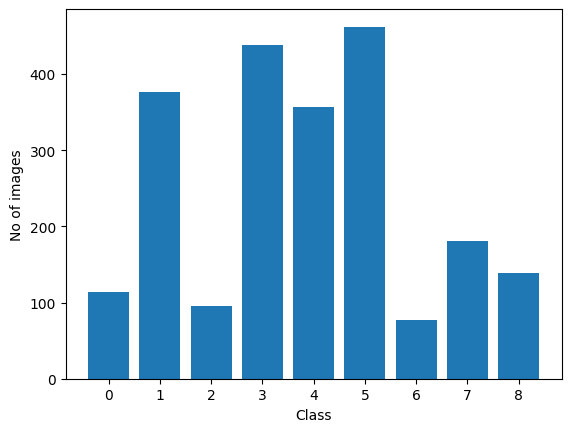

In [25]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter

X, y = df['Path'], df['Label']
y = LabelEncoder().fit_transform(y)
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

plt.bar(counter.keys(), counter.values())
plt.xticks([i for i in range(9)])
plt.xlabel("Class")
plt.ylabel("No of images")
plt.show()

# findings :
 **Which class has the least number of samples?**

Ans - From the above bar chart we can see that the class with label 6 has the least number of samples

**Which classes dominate the data in terms proportionate number of samples?**

Ans - We can observe that of all the class, class with label 5 has the most number of samples

# Handling class imbalances:

Rectify class imbalances present in the training dataset with Augmentor library.

In [26]:
!pip install Augmentor

To use Augmentor, the following general procedure is followed:

Instantiate a Pipeline object pointing to a directory containing your initial image data set.
Define a number of operations to perform on this data set using your Pipeline object.
Execute these operations by calling the Pipeline’s sample() method.

In [27]:
path_to_training_dataset="/content/gdrive/MyDrive/CNN/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7A78B48521A0>: 100%|██████████| 500/500 [00:23<00:00, 21.64 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A78B4C1DB40>: 100%|██████████| 500/500 [00:29<00:00, 17.19 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7A78B497D4B0>: 100%|██████████| 500/500 [00:25<00:00, 19.77 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7A78B4A18B20>: 100%|██████████| 500/500 [01:54<00:00,  4.37 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7A78B48D52D0>: 100%|██████████| 500/500 [01:39<00:00,  5.05 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A78B48FBE80>: 100%|██████████| 500/500 [00:24<00:00, 20.23 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7A78C4622080>: 100%|██████████| 500/500 [00:50<00:00,  9.87 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A78B4850490>: 100%|██████████| 500/500 [00:22<00:00, 21.88 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A78B4BFC2B0>: 100%|██████████| 500/500 [00:24<00:00, 20.21 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [28]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [29]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/CNN/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0025557.jpg_6e80c992-f21a-4459-9a83-8d49e52f40ac.jpg',
 '/content/gdrive/MyDrive/CNN/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0027966.jpg_60977389-a7a8-447e-8475-2e50c55e0f84.jpg',
 '/content/gdrive/MyDrive/CNN/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0027117.jpg_b01064b8-fc2a-498c-88a8-c6378dc9387b.jpg',
 '/content/gdrive/MyDrive/CNN/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0031026.jpg_901e156b-05a3-4c64-a100-e8940a76b961.jpg',
 '/content/gdrive/MyDrive/CNN/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0026845.jpg_384a65b3-ffa8-4a44-ae68-5cd28a2fe1fd.jpg',
 '/content/gdrive/MyDrive/CNN/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0029083.jpg_af84e52b-8dc9-421a-88a3-95a5f0b96406.jpg',
 '/content/gdrive/MyDrive/CNN/Train/basal cell carcinoma/output/basal cell c

In [30]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',


In [31]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2

In [32]:
new_df['Label'].value_counts()

Label
basal cell carcinoma          500
squamous cell carcinoma       500
nevus                         500
melanoma                      500
vascular lesion               500
seborrheic keratosis          500
pigmented benign keratosis    500
dermatofibroma                500
actinic keratosis             500
Name: count, dtype: int64

Train the model on the data created using Augmentor


In [33]:
batch_size = 32
img_height = 180
img_width = 180

Create a training dataset¶


In [34]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


Create a validation dataset


In [35]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


Create  model (make sure to include normalization)¶


In [36]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

Compile your model (Choose optimizer and loss function appropriately)¶


In [37]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train your model¶


In [38]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 279s 2s/step - loss: 2.0429 - accuracy: 0.2235 - val_loss: 1.7090 - val_accuracy: 0.3296
Epoch 2/30
169/169 [==============================] - 265s 2s/step - loss: 1.6446 - accuracy: 0.3665 - val_loss: 1.4939 - val_accuracy: 0.4573
Epoch 3/30
169/169 [==============================] - 284s 2s/step - loss: 1.4315 - accuracy: 0.4594 - val_loss: 1.4243 - val_accuracy: 0.4781
Epoch 4/30
169/169 [==============================] - 280s 2s/step - loss: 1.3491 - accuracy: 0.4874 - val_loss: 1.2790 - val_accuracy: 0.5256
Epoch 5/30
169/169 [==============================] - 276s 2s/step - loss: 1.2729 - accuracy: 0.5145 - val_loss: 1.3160 - val_accuracy: 0.4818
Epoch 6/30
169/169 [==============================] - 274s 2s/step - loss: 1.2230 - accuracy: 0.5382 - val_loss: 1.1779 - val_accuracy: 0.5583
Epoch 7/30
169/169 [==============================] - 272s 2s/step - loss: 1.1802 - accuracy: 0.5506 - val_loss: 1.3454 - val_accuracy: 0.4788

Visualize the model results


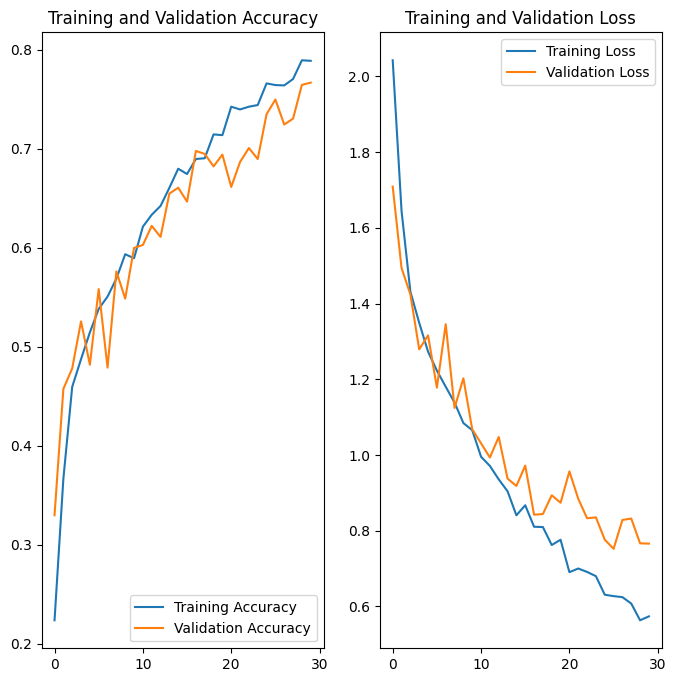

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?
**Findings:**
We can infer that the Model is fit with a good enough accuracy for both Train and Validation Data of max accuracy around 85% Rectifying the Class Imbalance and performing Data augumentation on the dataset has resulted in a model with higher accuracy and overcoming overfitting This is a good model to be used to predict Skin Cancer using CNN